<div class="alert alert-success"> 
        <h1 align="center" style="color:red;">Regression: Prediction of House Price, Buca, Turkey Dataset
</h1>  
     
</div>

# Importing Librabries and Loading Dataset

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [344]:
dataset = pd.read_csv('rent_price_dataset_buca.csv')

In [345]:
dataset.head()

,location,num_rooms,gross,building_age,floor_type,furnishing_status,price
0,merkez,4,135,18,intermediate,0,6000
1,merkez,2,50,4,intermediate,1,5000
2,merkez,2,60,0,intermediate,0,6000
3,merkez,2,55,0,intermediate,0,6000
4,merkez,2,55,0,intermediate,0,6000


# Checking for Missing values and Datatypes

In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           138 non-null    object
 1   num_rooms          138 non-null    int64 
 2   gross              138 non-null    int64 
 3   building_age       138 non-null    int64 
 4   floor_type         138 non-null    object
 5   furnishing_status  138 non-null    int64 
 6   price              138 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 7.7+ KB


In [127]:
dataset['location'] = dataset['location'].astype('category')  # Converting location column to category datatype
dataset['floor_type'] = dataset['floor_type'].astype('category')  # Converting location column to category datatype

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   location           138 non-null    category
 1   num_rooms          138 non-null    int64   
 2   gross              138 non-null    int64   
 3   building_age       138 non-null    int64   
 4   floor_type         138 non-null    category
 5   furnishing_status  138 non-null    int64   
 6   price              138 non-null    int64   
dtypes: category(2), int64(5)
memory usage: 6.1 KB


In [135]:
dataset.describe()

,num_rooms,gross,building_age,furnishing_status,price
count,138.000000,138.00000,138.000000,138.000000,138.000000
mean,3.173913,104.92029,13.311594,0.297101,5615.942029
std,0.853614,37.65170,10.236475,0.458646,1752.255955
min,2.000000,40.00000,0.000000,0.000000,2000.000000
25%,2.000000,66.25000,5.000000,0.000000,5000.000000
50%,3.000000,110.00000,11.000000,0.000000,5000.000000
75%,4.000000,133.75000,21.000000,1.000000,6000.000000
max,5.000000,200.00000,37.000000,1.000000,15000.000000


# Data Visualization

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_596\3691106640.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_set = dataset.groupby(feature)['price'].mean().reset_index()
C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_596\3691106640.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_set = dataset.groupby(feature)['price'].mean().reset_index()


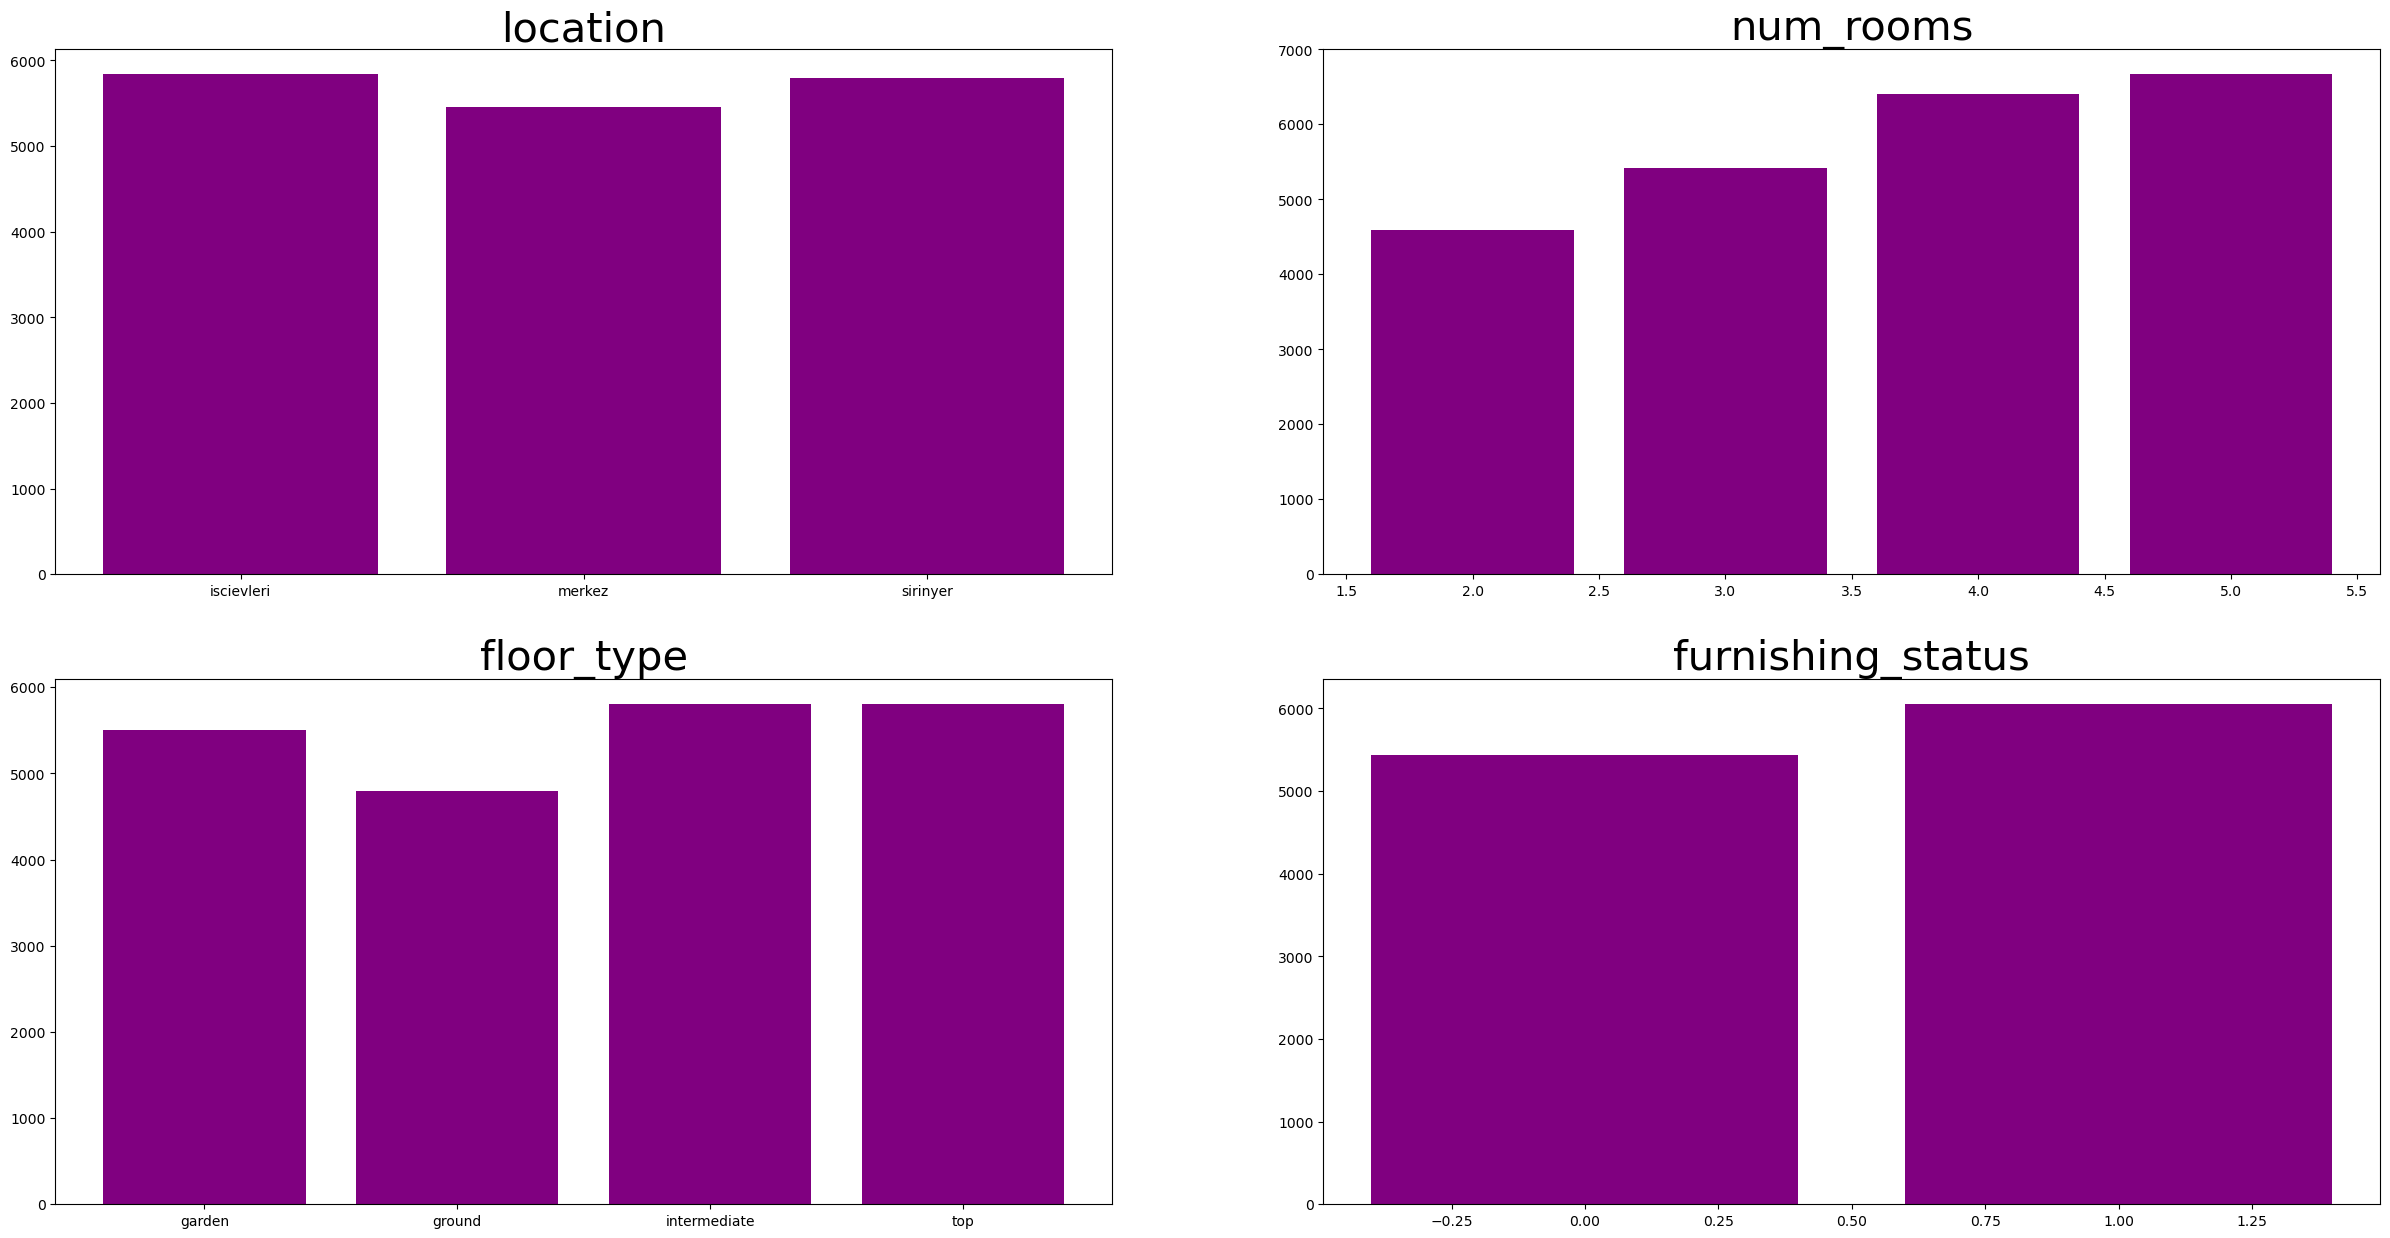

In [129]:
bar_plot_features = ['location','num_rooms', 'floor_type', 'furnishing_status']   #Features to be visualize with barplot

col1 = 0; col2 = 0
nth = 0

(fig, axes) = plt.subplots(nrows=2,ncols=2, figsize=(30,15), sharex = False)
for feature in bar_plot_features:
    sub_set = dataset.groupby(feature)['price'].mean().reset_index()
    
    if nth in [0,1]:
        axes[0][col1].bar(sub_set[feature], sub_set['price'], color='purple')
        axes[0][col1].set_title(feature, fontsize=30)
        col1+=1
        nth+=1
    else:
        axes[1][col2].bar(sub_set[feature], sub_set['price'], color='purple')
        axes[1][col2].set_title(feature, fontsize=30)
        col2+=1

In [134]:
# Only Numbers of rooms and furnishing status varies directly as the house price
dataset.groupby('num_rooms')['price'].mean().reset_index()

dataset.groupby('furnishing_status')['price'].mean().reset_index()

,furnishing_status,price
0,0,5432.989691
1,1,6048.780488


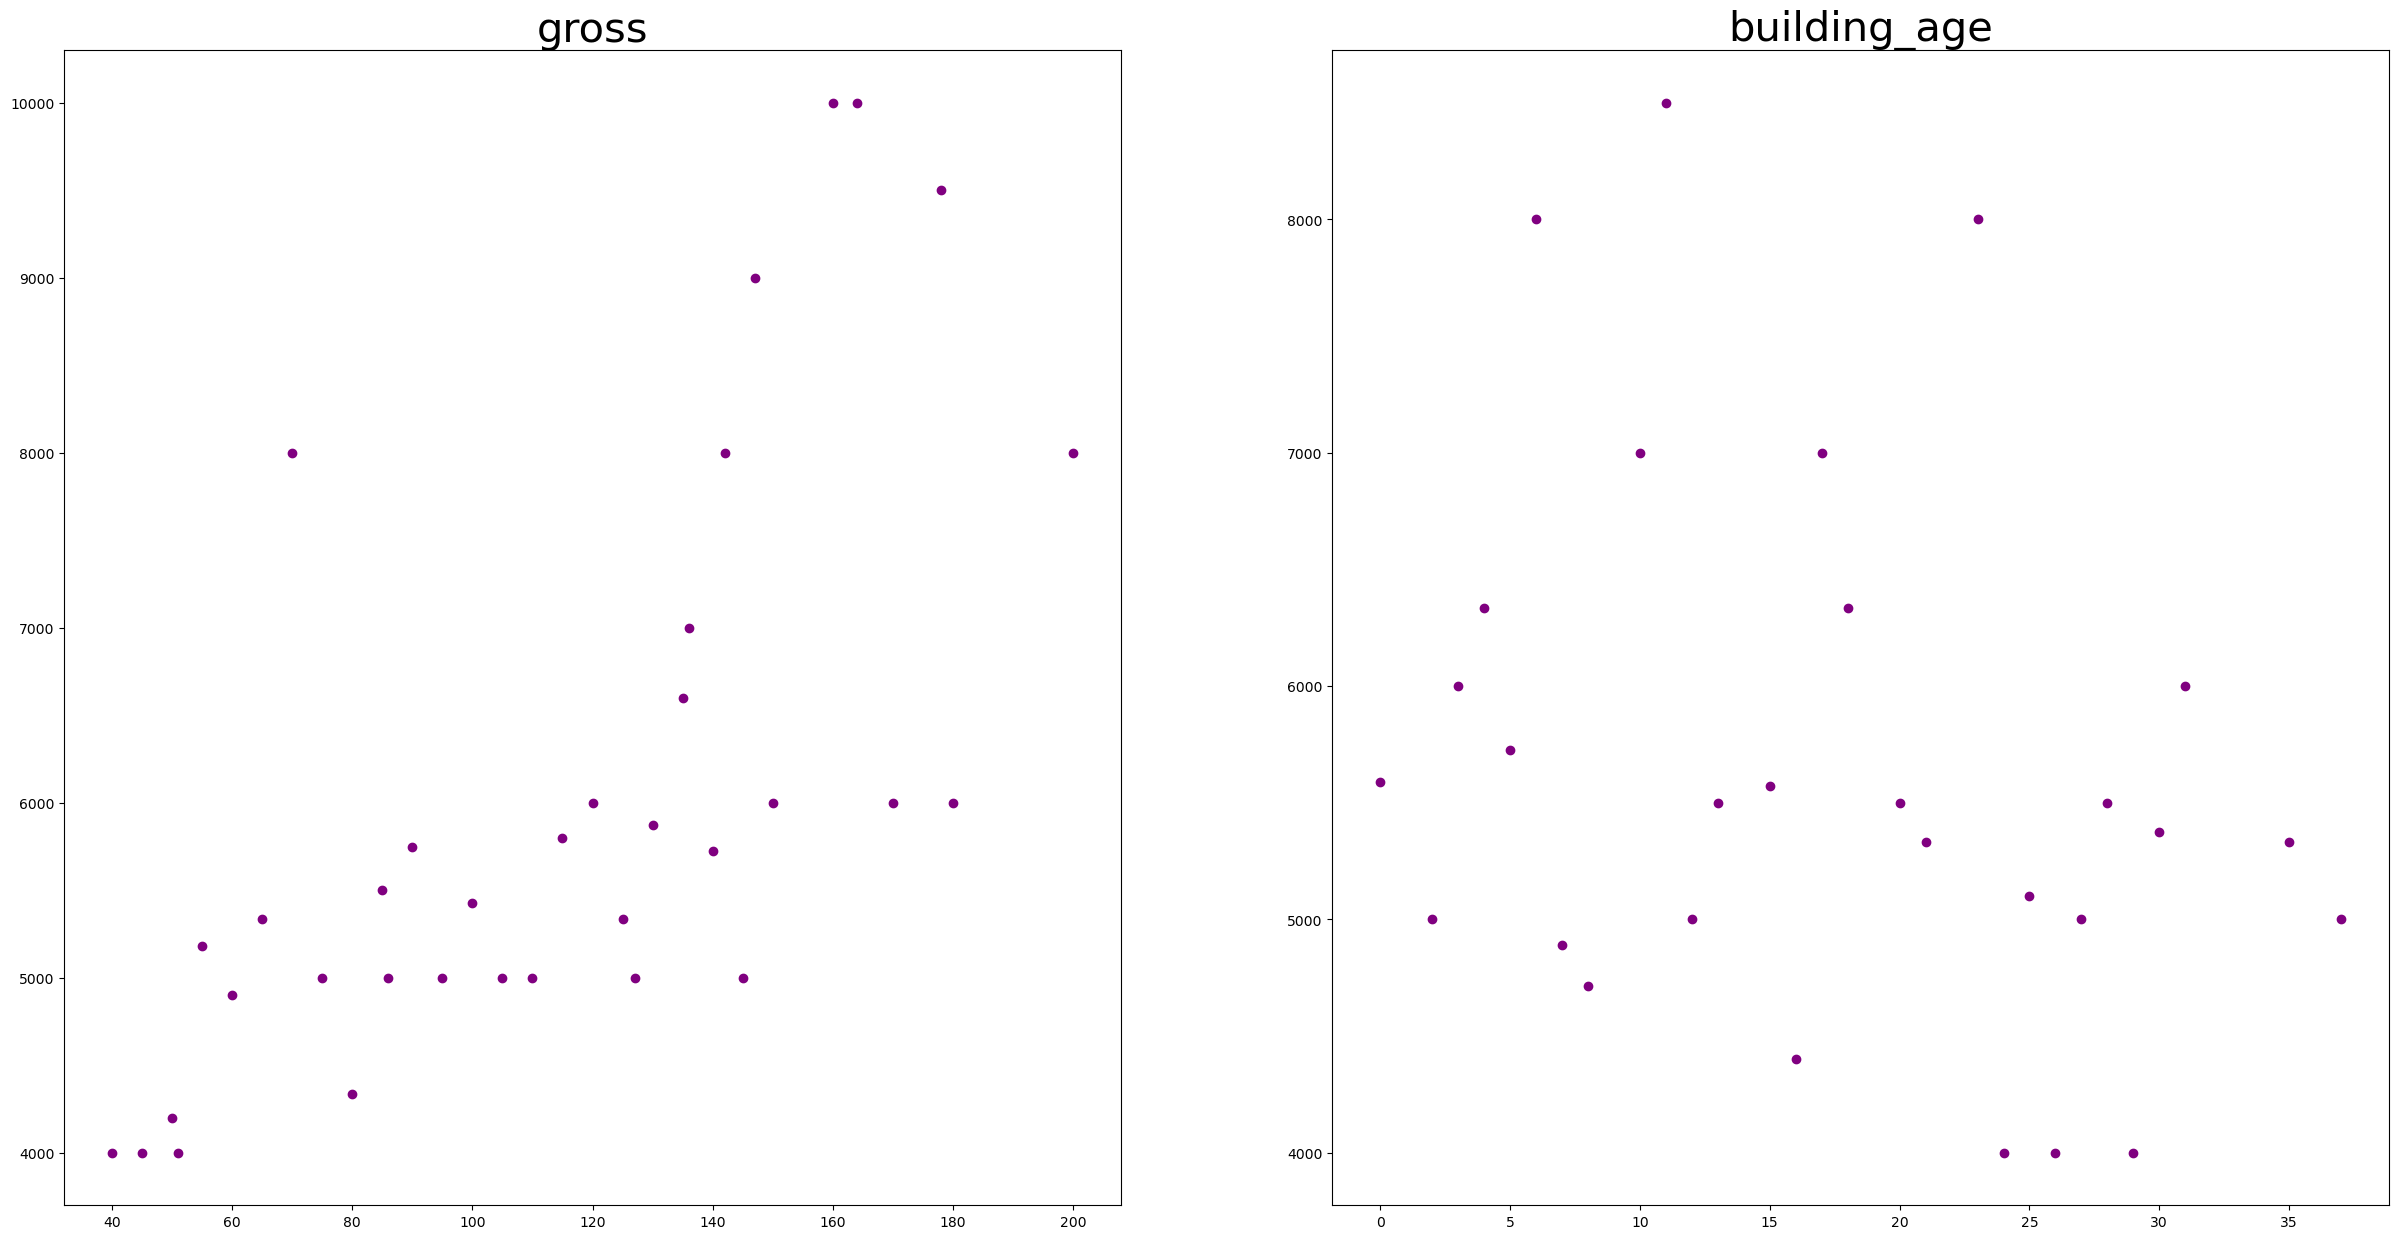

In [131]:
scatter_plot_features = ['gross', 'building_age']    #Features to be visualize with scatterplot

nth = 0

(fig, axes) = plt.subplots(nrows=1,ncols=2, figsize=(30,15), sharex = False)
for feature in scatter_plot_features:
    sub_set = dataset.groupby(feature)['price'].mean().reset_index()

    if nth == 0 :
        axes[0].scatter(sub_set[feature], sub_set['price'], color='purple')
        axes[0].set_title(feature, fontsize=30)
        nth+=1
    else:
        axes[1].scatter(sub_set[feature], sub_set['price'], color='purple')
        axes[1].set_title(feature, fontsize=30)

In [ ]:
# Just noises and no significant trend observable

# Linear regression Model with new feature

In [346]:
# Creating a new clomun
dataset['price_per_sq'] = dataset['price']/dataset['gross']

In [347]:
dataset

,location,num_rooms,gross,building_age,floor_type,furnishing_status,price,price_per_sq
0,merkez,4,135,18,intermediate,0,6000,44.444444
1,merkez,2,50,4,intermediate,1,5000,100.000000
2,merkez,2,60,0,intermediate,0,6000,100.000000
3,merkez,2,55,0,intermediate,0,6000,109.090909
4,merkez,2,55,0,intermediate,0,6000,109.090909
...,...,...,...,...,...,...,...,...
133,sirinyer,2,45,7,intermediate,1,4000,88.888889
134,sirinyer,3,120,30,intermediate,0,5000,41.666667
135,sirinyer,4,150,4,intermediate,0,6000,40.000000
136,sirinyer,4,140,28,intermediate,0,5000,35.714286


In [339]:
dataset['location'] = dataset['location'].astype('category')  # Converting location column to category datatype
dataset['floor_type'] = dataset['floor_type'].astype('category')  # Converting location column to category datatype

In [340]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   location           138 non-null    category
 1   num_rooms          138 non-null    int64   
 2   gross              138 non-null    int64   
 3   building_age       138 non-null    int64   
 4   floor_type         138 non-null    category
 5   furnishing_status  138 non-null    int64   
 6   price              138 non-null    int64   
 7   price_per_sq       138 non-null    float64 
dtypes: category(2), float64(1), int64(5)
memory usage: 7.2 KB


In [376]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Split featrues into categorical and numerical for easier preprocessing
numerical_features = ['num_rooms','gross','building_age', 'price_per_sq']
categorical_features = ['location', 'floor_type', 'furnishing_status']

# Preprocessing pipeline
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [1,2,3,7])
    ])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, [0,4,5])
    ])
        

#Split dataset into train and test
X = dataset.drop(['price', 'gross'], axis=1).values
y = dataset['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=10)
X_val = X_test  #Validation set

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])
model.fit(X_train,y_train)

# Make predictions on the validation data
predictions = model.predict(X_val)

# Create DataFrame containing house_id and predicted price
base_result = pd.DataFrame({'Price': predictions})

#You must return a dataframe named base_result
print(base_result)

          Price
0   5548.104984
1   5000.001563
2   6579.541591
3   5470.017469
4   6871.353625
5   5018.124625
6   5000.000670
7   5326.715472
8   4073.885470
9   5438.580883
10  5261.824293
11  5018.124625
12  6308.243650
13  5778.263291
14  4420.461284
15  3591.702528
16  5438.580883
17  5000.006338
18  5018.124625
19  5018.124625
20  6364.696976
21  6789.771312
22  3061.722169
23  5548.104984
24  5000.006338
25  5548.104984
26  6364.696976
27  5950.435794


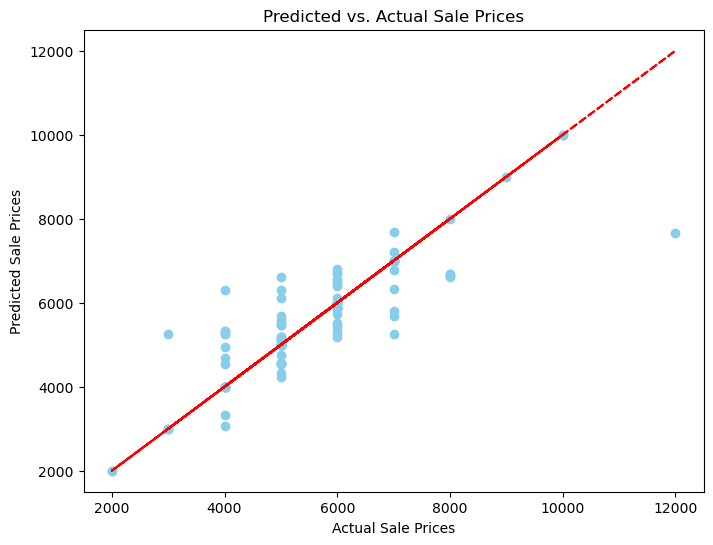

In [377]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_train, model.predict(X_train), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.show()

In [378]:
#R square for LinearRegression
model.score(X_test,y_test)

-0.08544201703741239

# First Model Training: LinearRegression

In [269]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Split featrues into categorical and numerical for easier preprocessing
numerical_features = ['num_rooms', 'gross', 'building_age']
categorical_features = ['location', 'floor_type', 'furnishing_status']

# Preprocessing pipeline
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [1,2,3]),
        ('cat', categorical_transformer, [0,4,5])
    ])

#Split dataset into train and test
X = dataset.drop(['price'], axis=1).values
y = dataset['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=10)
X_val = X_test  #Validation set

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train,y_train)

# Make predictions on the validation data
predictions = model.predict(X_val)

# Create DataFrame containing house_id and predicted price
base_result = pd.DataFrame({'Price': predictions})


#You must return a dataframe named base_result
print(base_result)

          Price
0   7753.572048
1   4747.985081
2   6443.294145
3   5317.014162
4   7194.445846
5   4930.050874
6   5845.893157
7   5192.329028
8   4572.199489
9   5695.666166
10  5217.864289
11  6785.099713
12  5287.010933
13  4593.978940
14  6565.497019
15  5149.239690
16  5086.955307
17  4244.300154
18  4464.462903
19  5805.807238
20  6700.592859
21  6112.505887
22  3679.085757
23  6038.394723
24  4133.209982
25  6688.018222
26  5381.709582
27  3975.453996


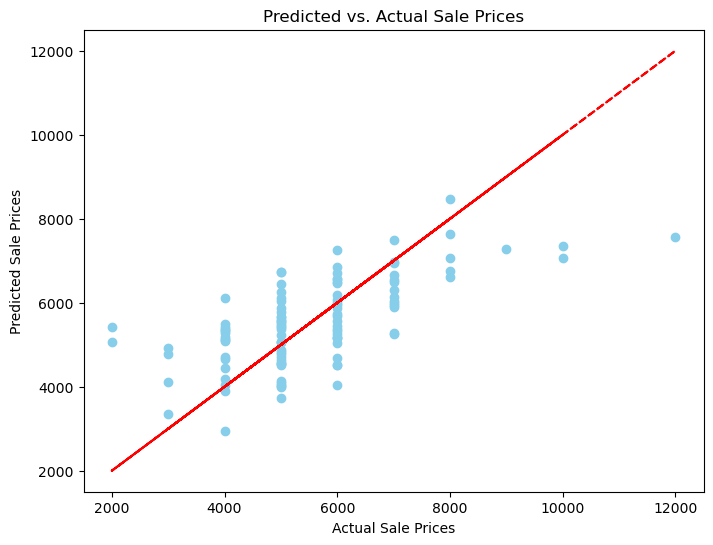

In [270]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_train, model.predict(X_train), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.show()

In [252]:
# Predicted values are widely spread around fitted line

In [271]:
#R square for LinearRegression
model.score(X_test,y_test)

0.4270325407336054

# Second Model Training: LinearRegression with Normalized data

In [229]:
# Normalizing Numerical columns
numerical_features = ['num_rooms', 'gross', 'building_age']

for column in numerical_features:
    dataset[column] = dataset[column] / dataset[column].abs().max()

In [230]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Split featrues into categorical and numerical for easier preprocessing
numerical_features = ['num_rooms', 'gross', 'building_age']
categorical_features = ['location', 'floor_type', 'furnishing_status']

# Preprocessing pipeline
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [1,2,3]),
        ('cat', categorical_transformer, [0,4,5])
    ])

#Split dataset into train and test
X = dataset.drop(['price'], axis=1).values
y = dataset['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=10)
X_val = X_test  #Validation set

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train,y_train)

# Make predictions on the validation data
predictions = model.predict(X_val)

# Create DataFrame containing house_id and predicted price
base_result = pd.DataFrame({'Price': predictions})

#You must return a dataframe named base_result
print(base_result)

          Price
0   7753.572048
1   4747.985081
2   6443.294145
3   5317.014162
4   7194.445846
5   4930.050874
6   5845.893157
7   5192.329028
8   4572.199489
9   5695.666166
10  5217.864289
11  6785.099713
12  5287.010933
13  4593.978940
14  6565.497019
15  5149.239690
16  5086.955307
17  4244.300154
18  4464.462903
19  5805.807238
20  6700.592859
21  6112.505887
22  3679.085757
23  6038.394723
24  4133.209982
25  6688.018222
26  5381.709582
27  3975.453996


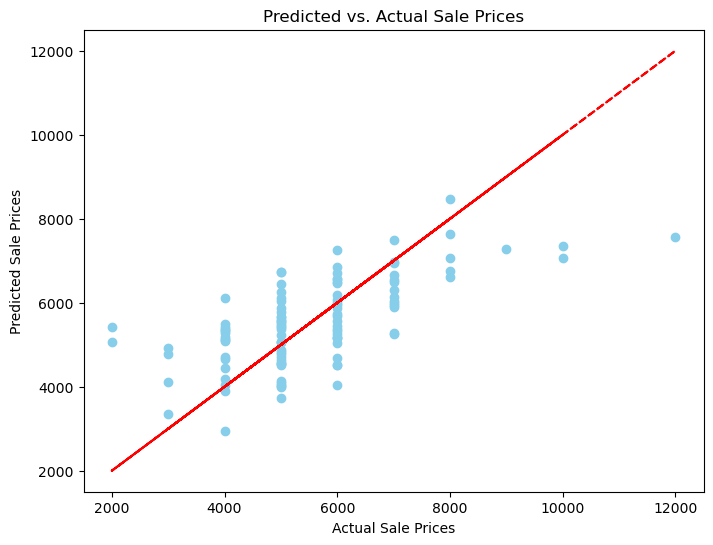

In [231]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_train, model.predict(X_train), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.show()

In [232]:
#R square for LinearRegression
model.score(X_test,y_test)   # Same as previous model

0.4270325407336064

# Third Model Training: RandomForestRegressor

In [226]:
#Importing Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Split featrues into categorical and numerical for easier preprocessing
numerical_features = ['num_rooms', 'gross', 'building_age']
categorical_features = ['location', 'floor_type', 'furnishing_status']

# Preprocessing pipeline
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [1,2,3]),
        ('cat', categorical_transformer, [0,4,5])
    ])

#Plitting Dataset into train and test set
X = dataset.drop(['price'], axis=1).values
y = dataset['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=5)
X_val = X_test   # Validation set

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])
model.fit(X_train,y_train)

# Make predictions on the validation data
predictions = model.predict(X_val)

# Create DataFrame containing house_id and predicted price
base_result = pd.DataFrame({'Price': predictions})


#You must return a dataframe named base_result
print(base_result)

          Price
0   6660.000000
1   5910.000000
2   4580.000000
3   5249.571429
4   5930.000000
5   6120.000000
6   4700.000000
7   8120.000000
8   5140.000000
9   5850.000000
10  4090.000000
11  4170.000000
12  3600.000000
13  4142.166667
14  7160.000000
15  5220.000000
16  5160.000000
17  4200.000000
18  4180.000000
19  4580.000000
20  8590.000000
21  4950.000000
22  5034.309524
23  5317.142857
24  4480.000000
25  6420.000000
26  5100.000000
27  9180.000000


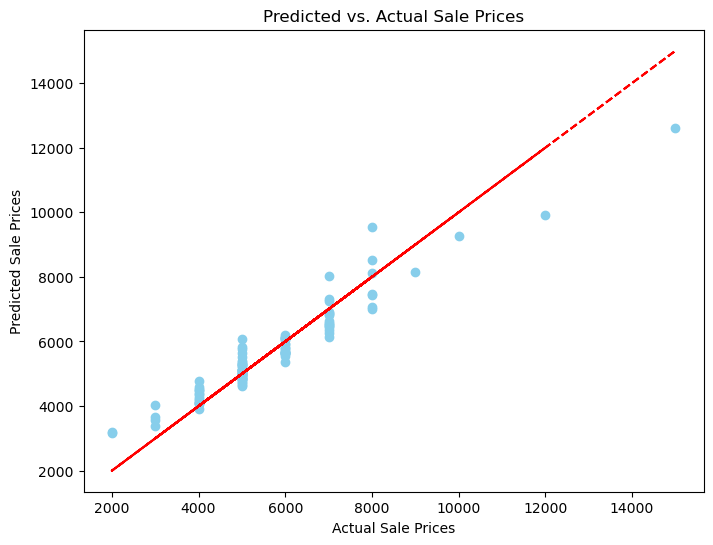

In [227]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_train, model.predict(X_train), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.show()


In [ ]:
# Predicted values still widely spread around fitted line

In [228]:
#R score for model evaluation
model.score(X_test,y_test)    #Performed better relative to linearregression model

0.5263565653179021

# Forth Model Training: RandomForestRegressor but normalized data

In [233]:
numerical_features = ['num_rooms', 'gross', 'building_age']

for column in numerical_features:
    dataset[column] = dataset[column] / dataset[column].abs().max()

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


#converting categorical values into numerical
#numerical features and categorical features
numerical_features = ['num_rooms', 'gross', 'building_age']
categorical_features = ['location', 'floor_type', 'furnishing_status']


# Preprocessing pipeline
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [1,2,3]),
        ('cat', categorical_transformer, [0,4,5])
    ])


X = dataset.drop(['price'], axis=1).values
y = dataset['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=5)
X_val = X_test

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])
model.fit(X_train,y_train)
# Make predictions on the validation data
predictions = model.predict(X_val)

# Create DataFrame containing house_id and predicted price
base_result = pd.DataFrame({'Price': predictions})

#You must return a dataframe named base_result
print(base_result)

          Price
0   6880.000000
1   5800.000000
2   4680.000000
3   5432.619048
4   6380.000000
5   5970.000000
6   4560.000000
7   8040.000000
8   5070.000000
9   6030.000000
10  4090.000000
11  3920.000000
12  3710.000000
13  4290.000000
14  7200.000000
15  5480.000000
16  5050.000000
17  4320.000000
18  3830.000000
19  4860.000000
20  8640.000000
21  5000.000000
22  4919.452381
23  4990.000000
24  4580.000000
25  6280.000000
26  5090.000000
27  9240.000000


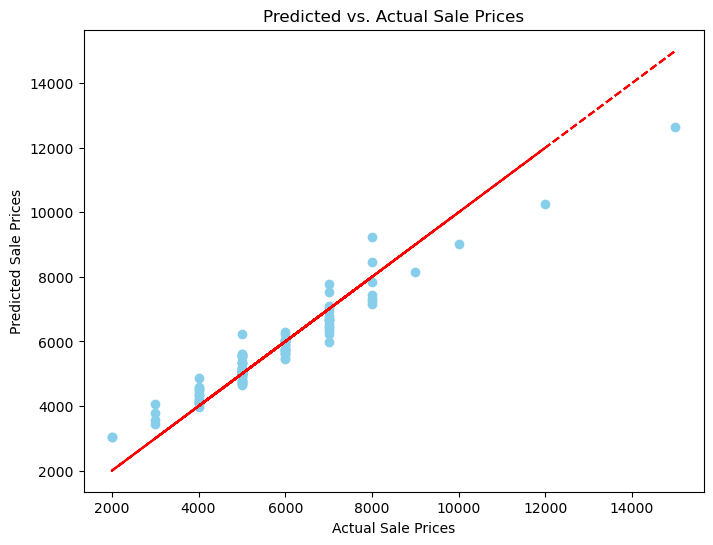

In [235]:
# Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_train, model.predict(X_train), color='skyblue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Predicted vs. Actual Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.show()


In [236]:
model.score(X_test,y_test)  #Model performed lesser

0.5074400801822894

# Conclusion

In [238]:
# So in conclusion, RandomForestRegressor performed better without Normalized data
# Note VIF or Correlation test ws not done on Features.

<div class="alert alert-success"> 
        <h1 align="center" style="color:red;">THANK YOU!
</h1>  
     
</div>